In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from datetime import datetime
import networkx as nx
import scipy
import itertools

In [2]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\temp-prec-conf1.csv"
df = pd.read_csv(file)

In [3]:
reg=[]
for admin in df['admin1'].unique():
    a = df[df['admin1']==admin].reset_index(drop=True)
    reg.append(a)

In [7]:
for i in range(18):
    reg[i]['year'] = reg[i]['time'].str[:4]
    reg[i]['month'] = reg[i]['time'].str[5:7]

    reg[i]['avg_temp'] = np.tile(reg[i].groupby('month')['tmx'].mean(), 13)
    reg[i]['std_temp'] = np.tile(reg[i].groupby('month')['tmx'].std(), 13)
    
    reg[i]['difference']= (reg[i]['tmx']-reg[i]['avg_temp'])/reg[i]['std_temp']
    reg[i]['TA'] = (reg[i]['difference'].shift(2) + reg[i]['difference'].shift(1) + reg[i]['difference'])/3
    
    reg[i]['avg_pre'] = np.tile(reg[i].groupby('month')['pre'].mean(), 13)
    reg[i]['std_pre'] = np.tile(reg[i].groupby('month')['pre'].std(), 13)
    reg[i]['diff_p']= (reg[i]['pre']-reg[i]['avg_pre'])/reg[i]['std_pre']
    reg[i]['PA'] = (reg[i]['diff_p'].shift(2) + reg[i]['diff_p'].shift(1) + reg[i]['diff_p'])/3
    
    reg[i] = reg[i].reindex(columns=['time','admin1','conflicts','TA','PA'])
    reg[i] = reg[i].reset_index()

In [10]:
reg_TA_PA=pd.concat([reg[i] for i in range(18)], axis=0)

In [11]:
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Lower Shabelle', 'Lower_Shabelle')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Middle Shabelle', 'Middle_Shabelle')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Lower Juba', 'Lower_Juba')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Middle Juba', 'Middle_Juba')
reg_TA_PA['admin1'] = reg_TA_PA['admin1'].str.replace('Woqooyi Galbeed', 'Woqooyi_Galbeed')

In [12]:
reg_TA_PA['DL'] = 0
mask = reg_TA_PA['TA'] > 0
# Create a group identifier for each consecutive group
group_id = (mask != mask.shift()).cumsum()
# Calculate the count within each group
count = reg_TA_PA.groupby(group_id).cumcount() + 1
# Assign the count values to the 'DL' column
reg_TA_PA['DL'] = np.where(mask, count, 0)

In [13]:
reg_TA_PA.to_csv("reg_TA_PA_DL_old.csv", index=False)

In [47]:
ban=reg_TA_PA[reg_TA_PA['admin1']=='Banadir'].reset_index(drop=True)

In [24]:
mn_ta=reg_TA_PA.groupby('time')['TA'].mean().reset_index()
mn_pa=reg_TA_PA.groupby('time')['PA'].mean().reset_index()
mn_dl=reg_TA_PA.groupby('time')['DL'].mean().reset_index()

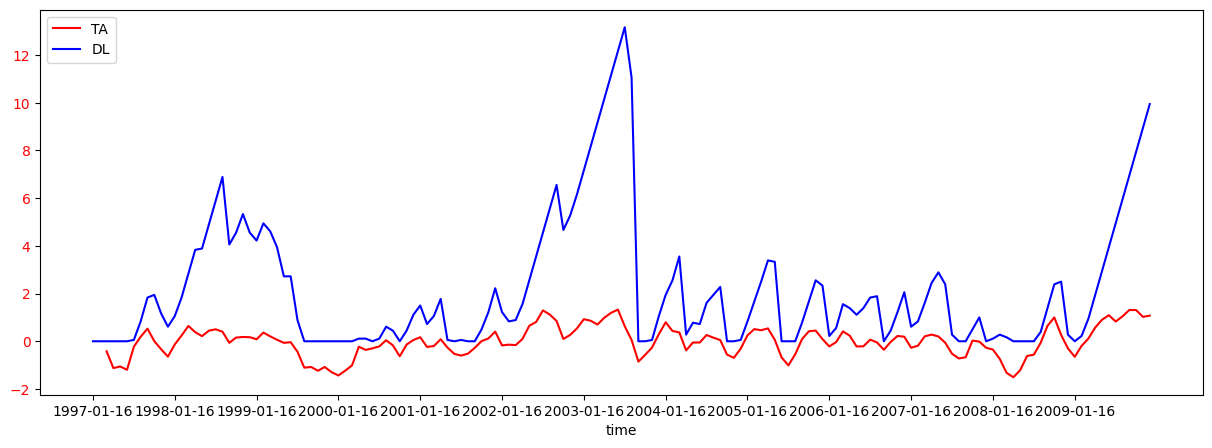

In [46]:
#plot both TA and DL in the same figure with time as x-axis
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(mn_ta['time'], mn_ta['TA'], color='red', label='TA')
ax1.plot(mn_dl['time'], mn_dl['DL'], color='blue', label='DL')
ax1.set_xticks(ax1.get_xticks()[::12])
ax1.set_xlabel('time')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')


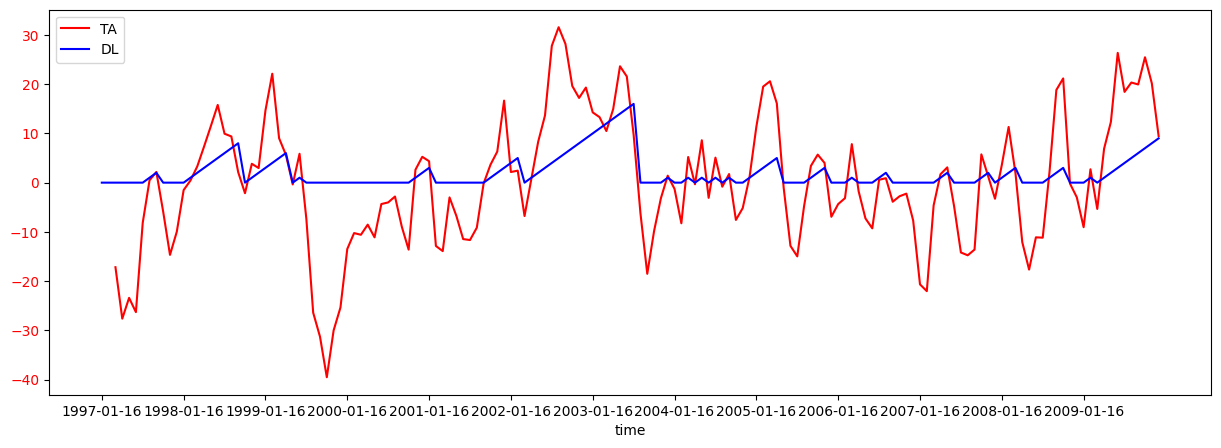

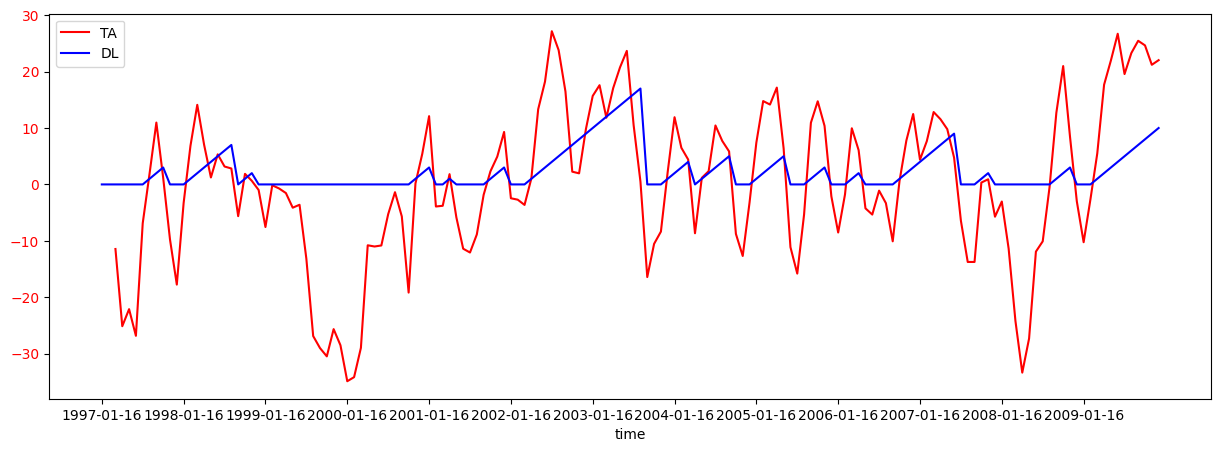

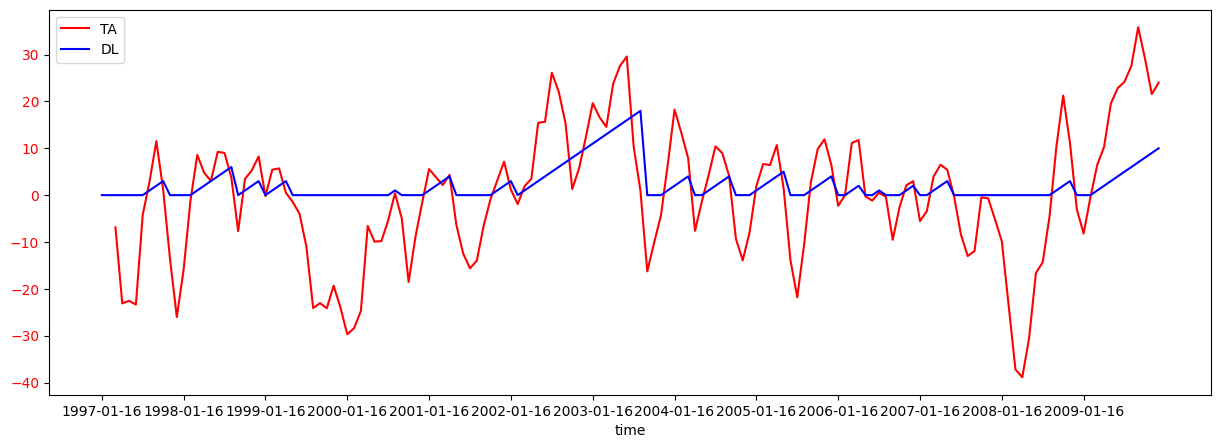

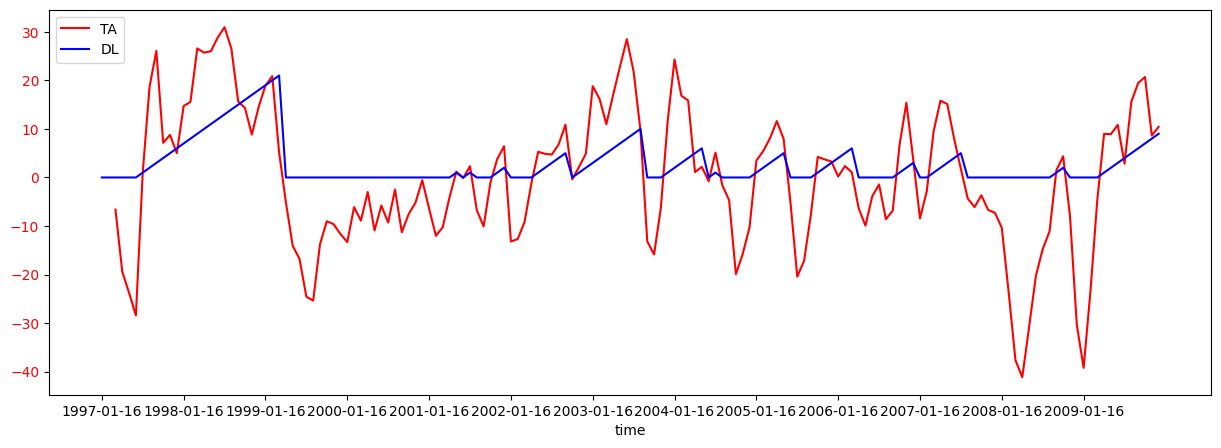

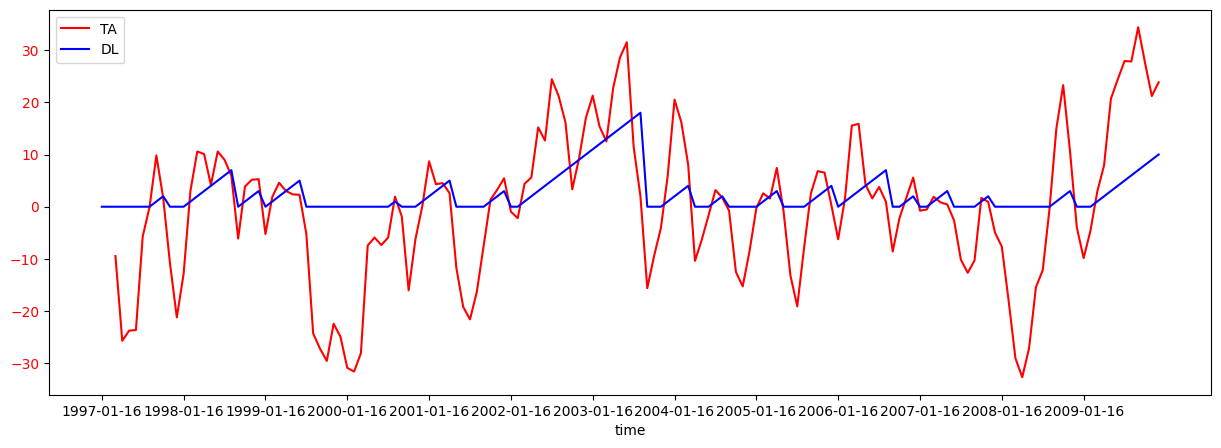

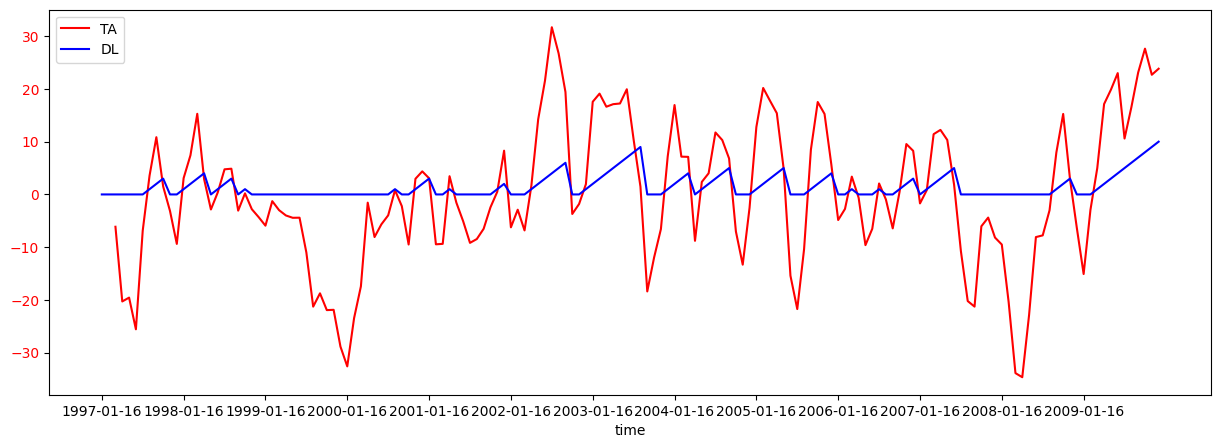

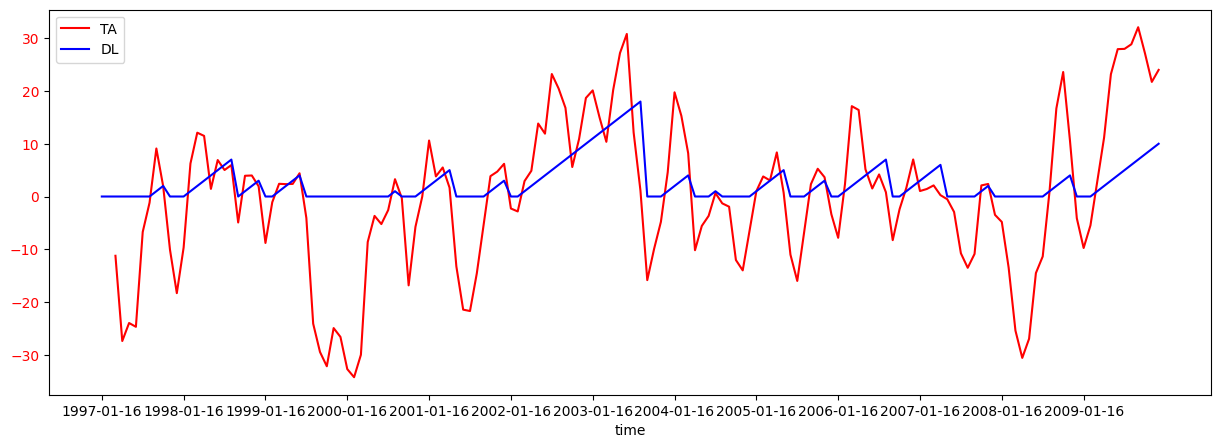

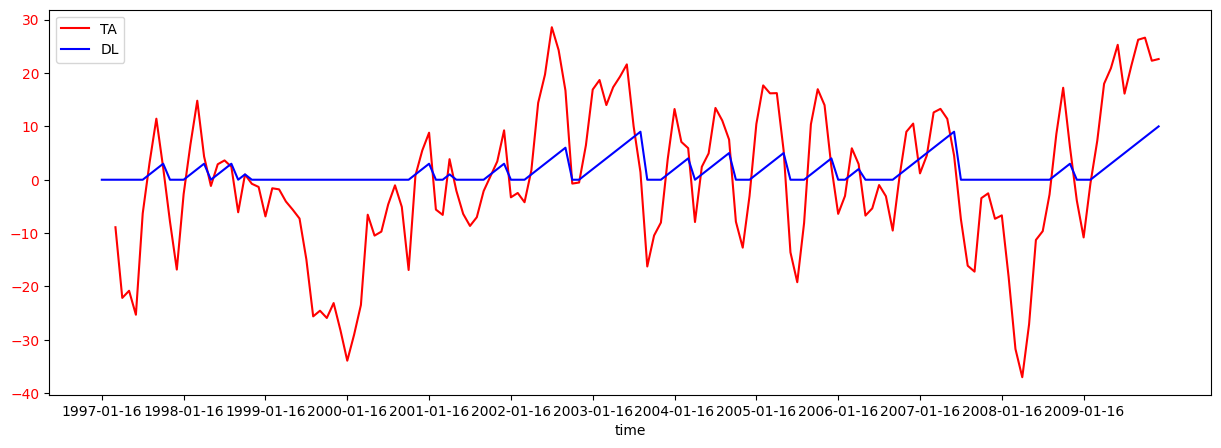

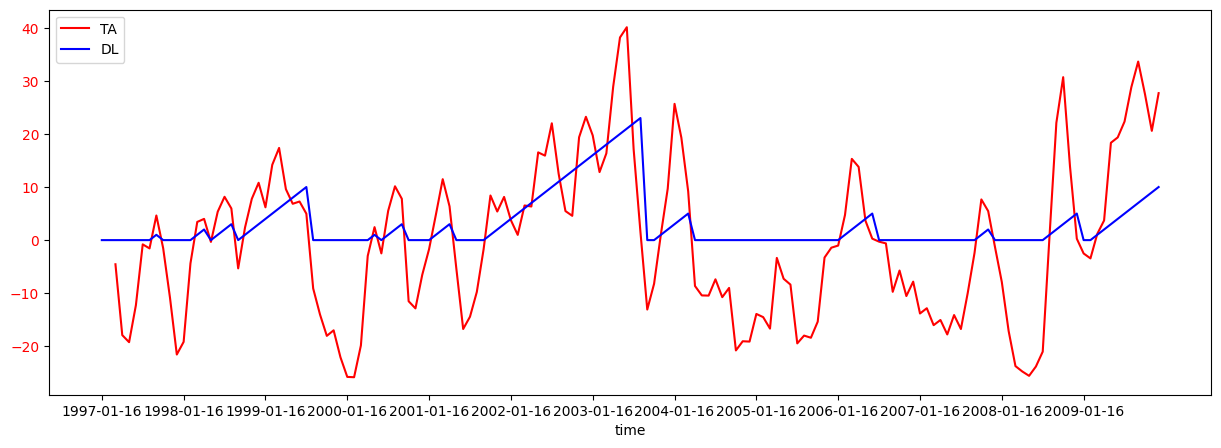

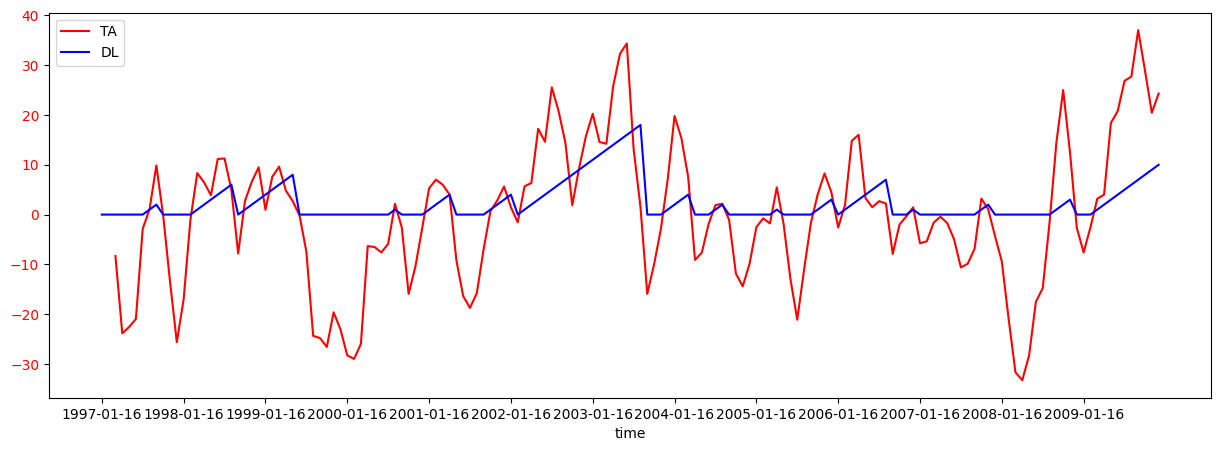

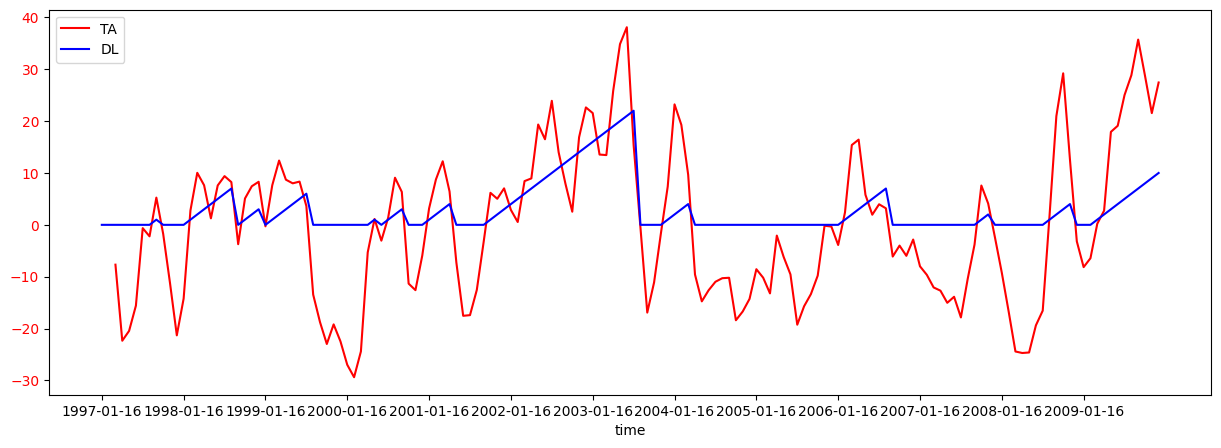

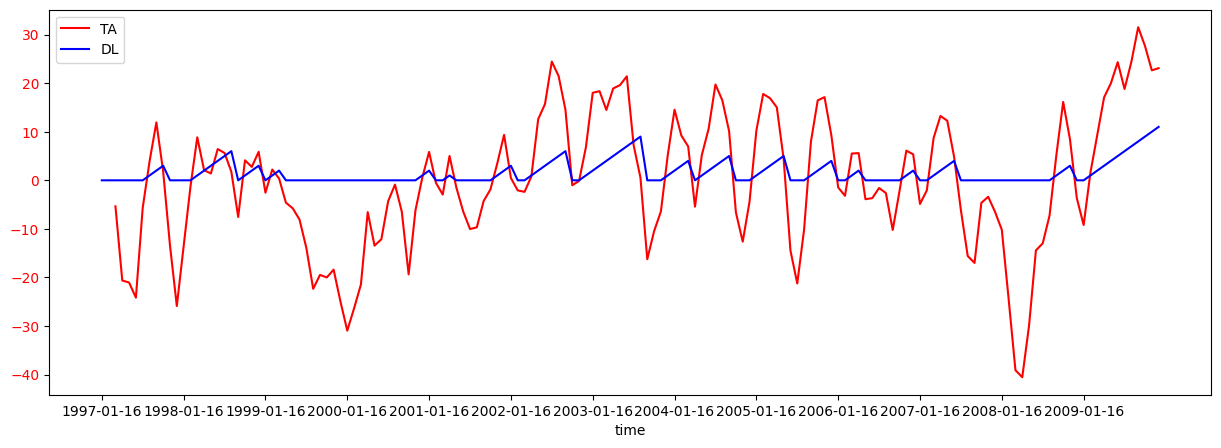

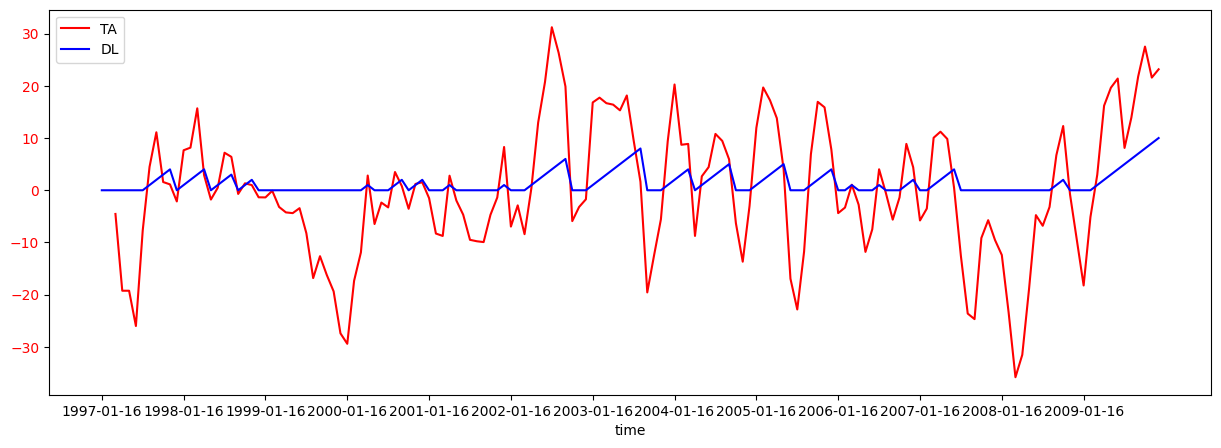

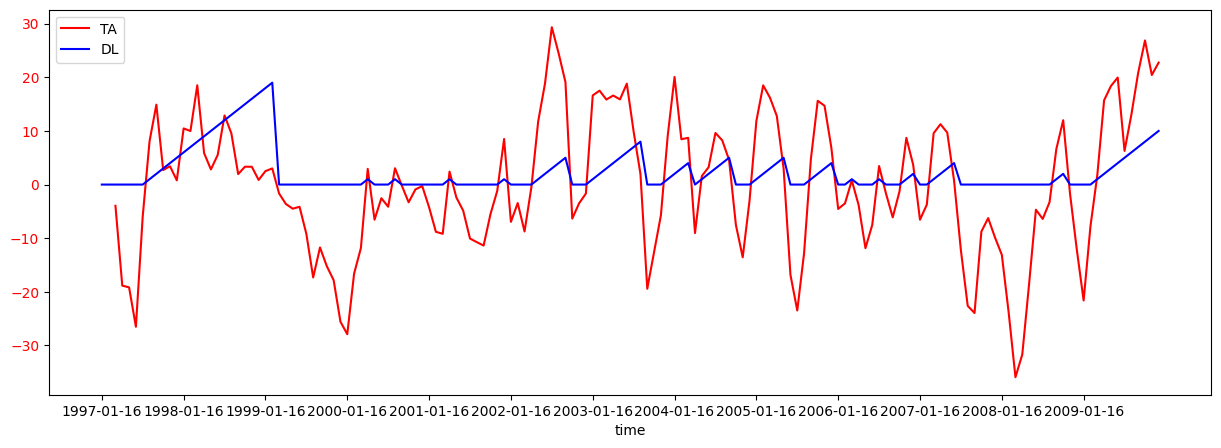

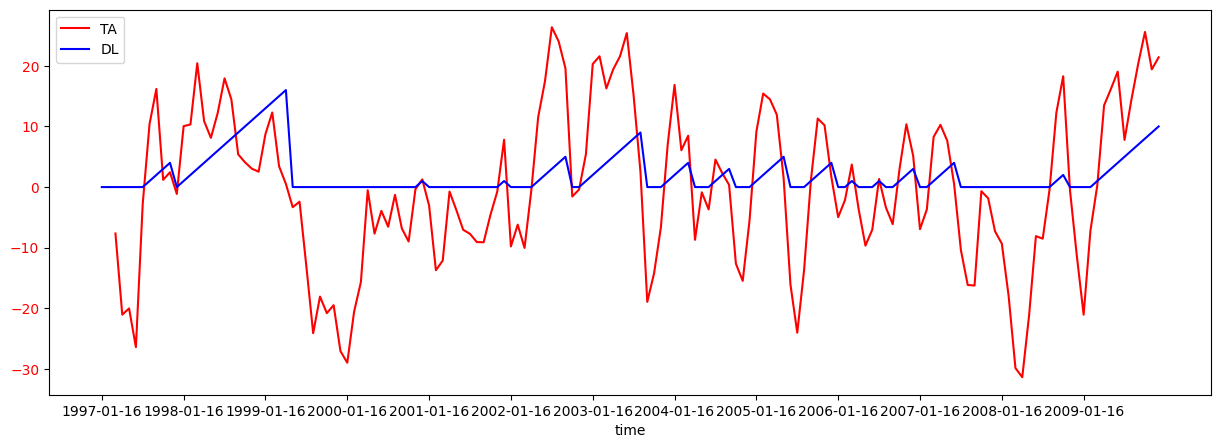

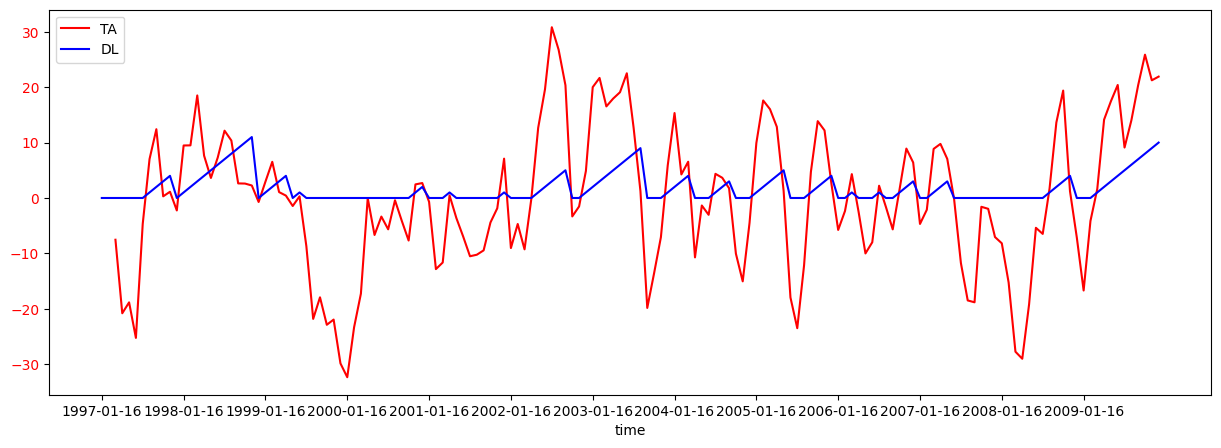

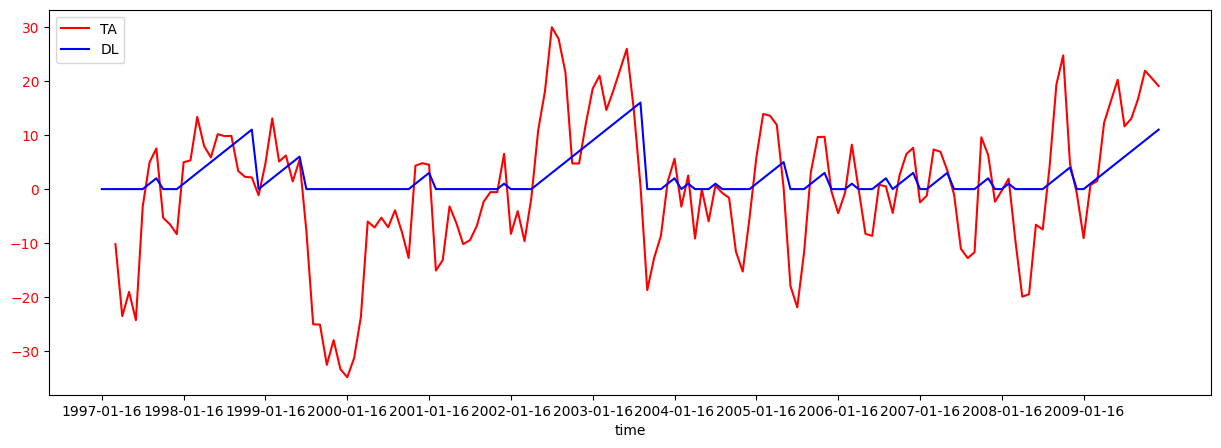

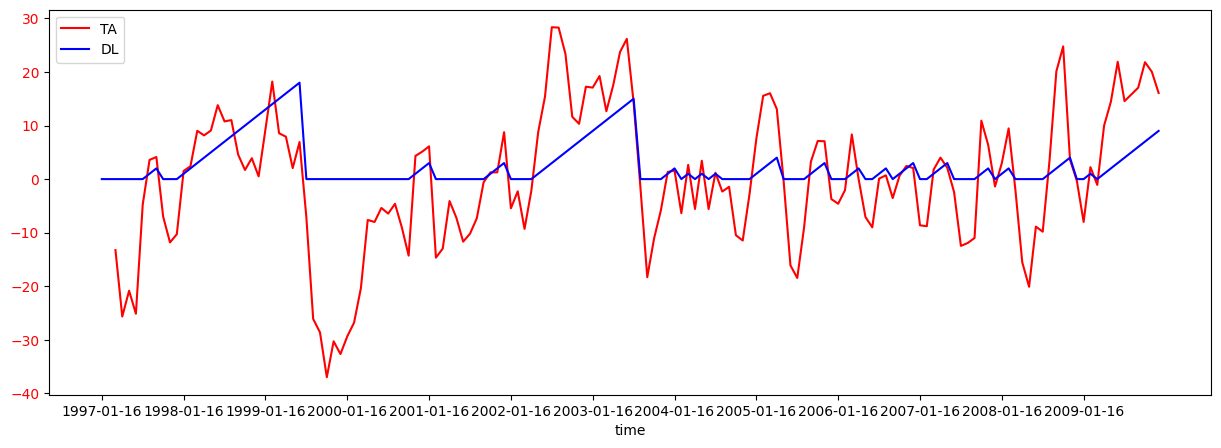

In [52]:
for ban in reg_TA_PA['admin1'].unique():
    ban=reg_TA_PA[reg_TA_PA['admin1']==ban].reset_index(drop=True)

    fig, ax1 = plt.subplots(figsize=(15,5))
    ax1.plot(ban['time'], 20*ban['TA'], color='red', label='TA')
    ax1.plot(ban['time'], ban['DL'], color='blue', label='DL')
    ax1.set_xticks(ax1.get_xticks()[::12])
    ax1.set_xlabel('time')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.legend(loc='upper left')
    plt.show()